## Part 3: Individual feature exploration critical for understanding credit risk drivers

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
print("="*60)
print("Univariate Analysis")
print("="*60)

Univariate Analysis


In [3]:
df_clean = pd.read_csv('application_train_cleaned.csv')
print(f"Loaded cleaned data: {df_clean.shape}")

Loaded cleaned data: (307511, 81)


/var/folders/1_/bwh3j9hx0fs5c8dhd9d9l_zc0000gn/T/ipykernel_17551/3634607157.py:12: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_features = df.select_dtypes(include = ["object"]).columns.tolist()



 Numeric Features: 67

 Categorical Features: 13

Numerical Feature Analysis

[Feature: SK_ID_CURR]
Mean: 278,180.52 | Median: 278,202.00 | Std: 102,790.18
Range: [100002.00, 456,255.00]
Skewness: -0.00 | Kurtosis: -1.20
Missing Percentage: 0.00%

[Feature: CNT_CHILDREN]
Mean: 0.41 | Median: 0.00 | Std: 0.68
Range: [0.00, 2.50]
Skewness: 1.48 | Kurtosis: 0.98
Missing Percentage: 0.00%
Highly skewed distribution (right)

[Feature: AMT_INCOME_TOTAL]
Mean: 162,626.95 | Median: 147,150.00 | Std: 73,303.15
Range: [25650.00, 337,500.00]
Skewness: 0.78 | Kurtosis: -0.04
Missing Percentage: 0.00%

[Feature: AMT_CREDIT]
Mean: 592,313.04 | Median: 513,531.00 | Std: 380,316.24
Range: [45000.00, 1,616,625.00]
Skewness: 0.88 | Kurtosis: 0.07
Missing Percentage: 0.00%

[Feature: AMT_ANNUITY]
Mean: 26,797.66 | Median: 24,903.00 | Std: 13,281.29
Range: [1615.50, 61,704.00]
Skewness: 0.71 | Kurtosis: -0.01
Missing Percentage: 0.00%

[Feature: AMT_GOODS_PRICE]
Mean: 527,855.33 | Median: 450,000.00 | St

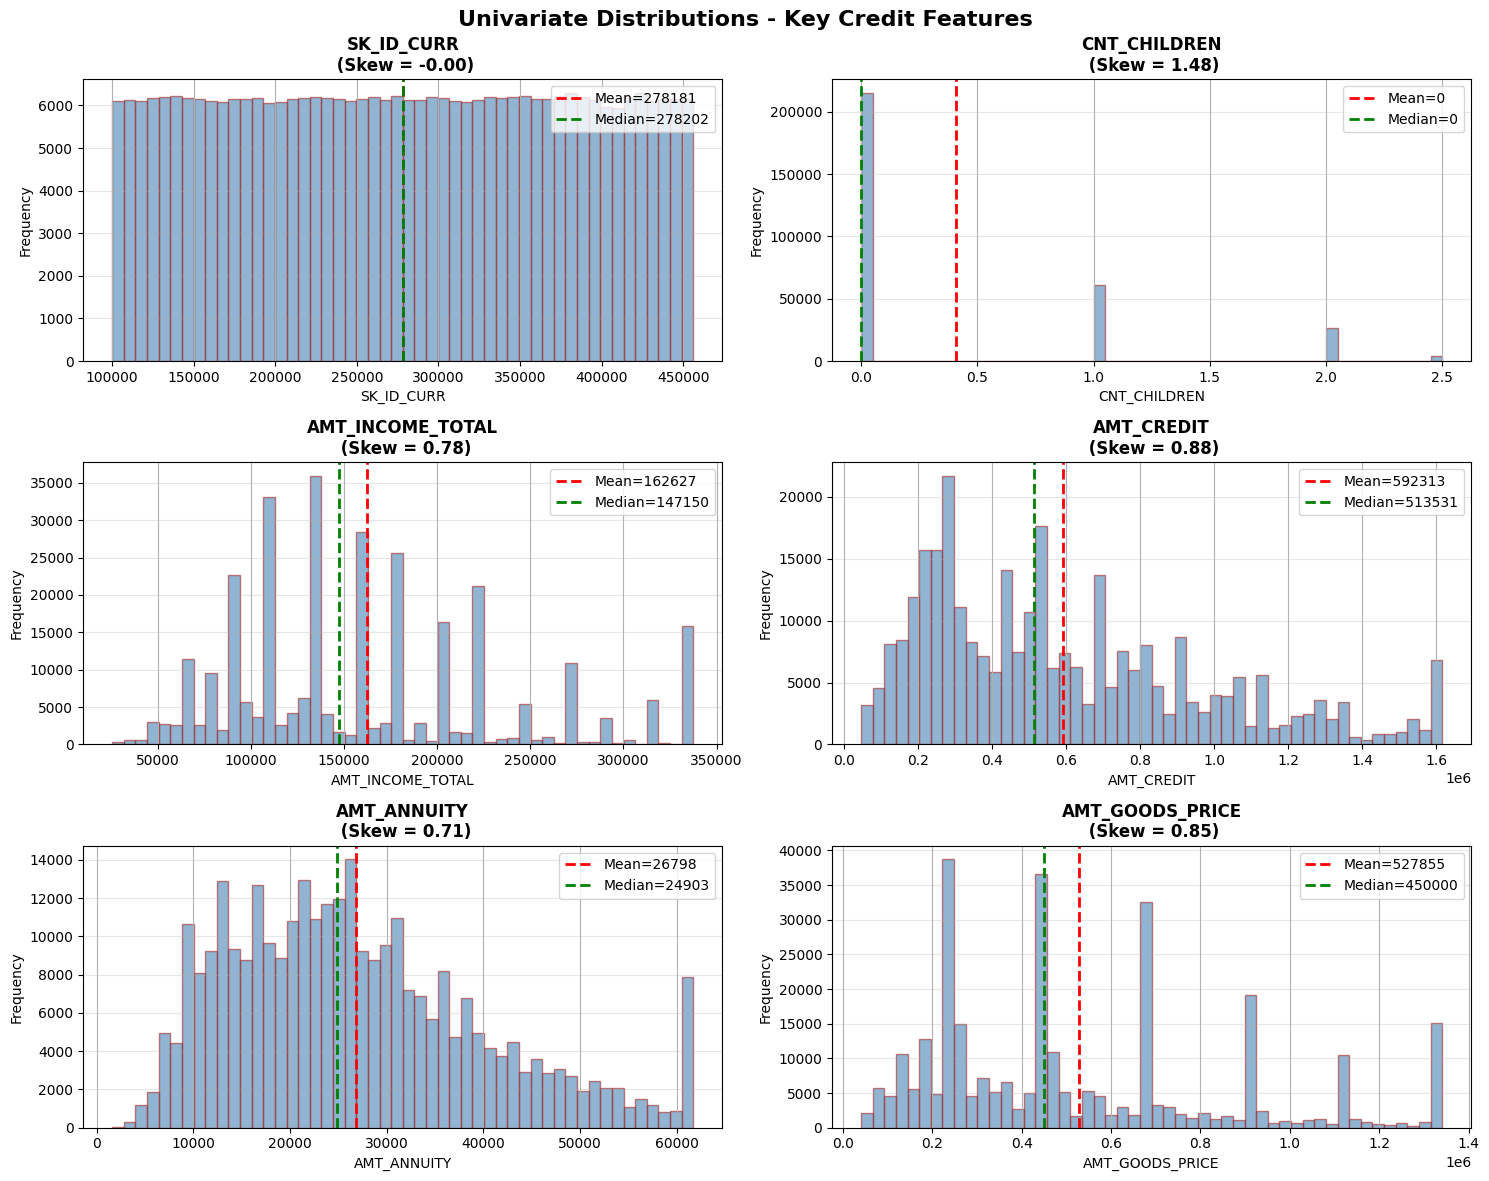

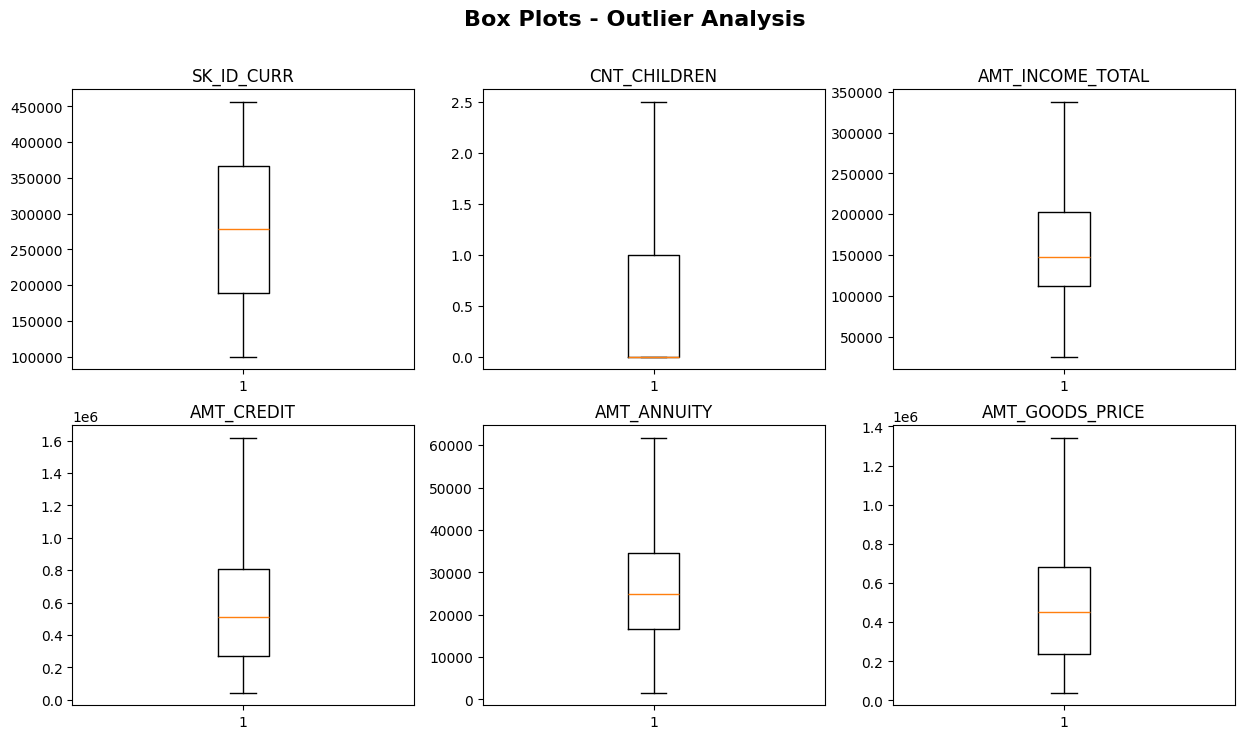

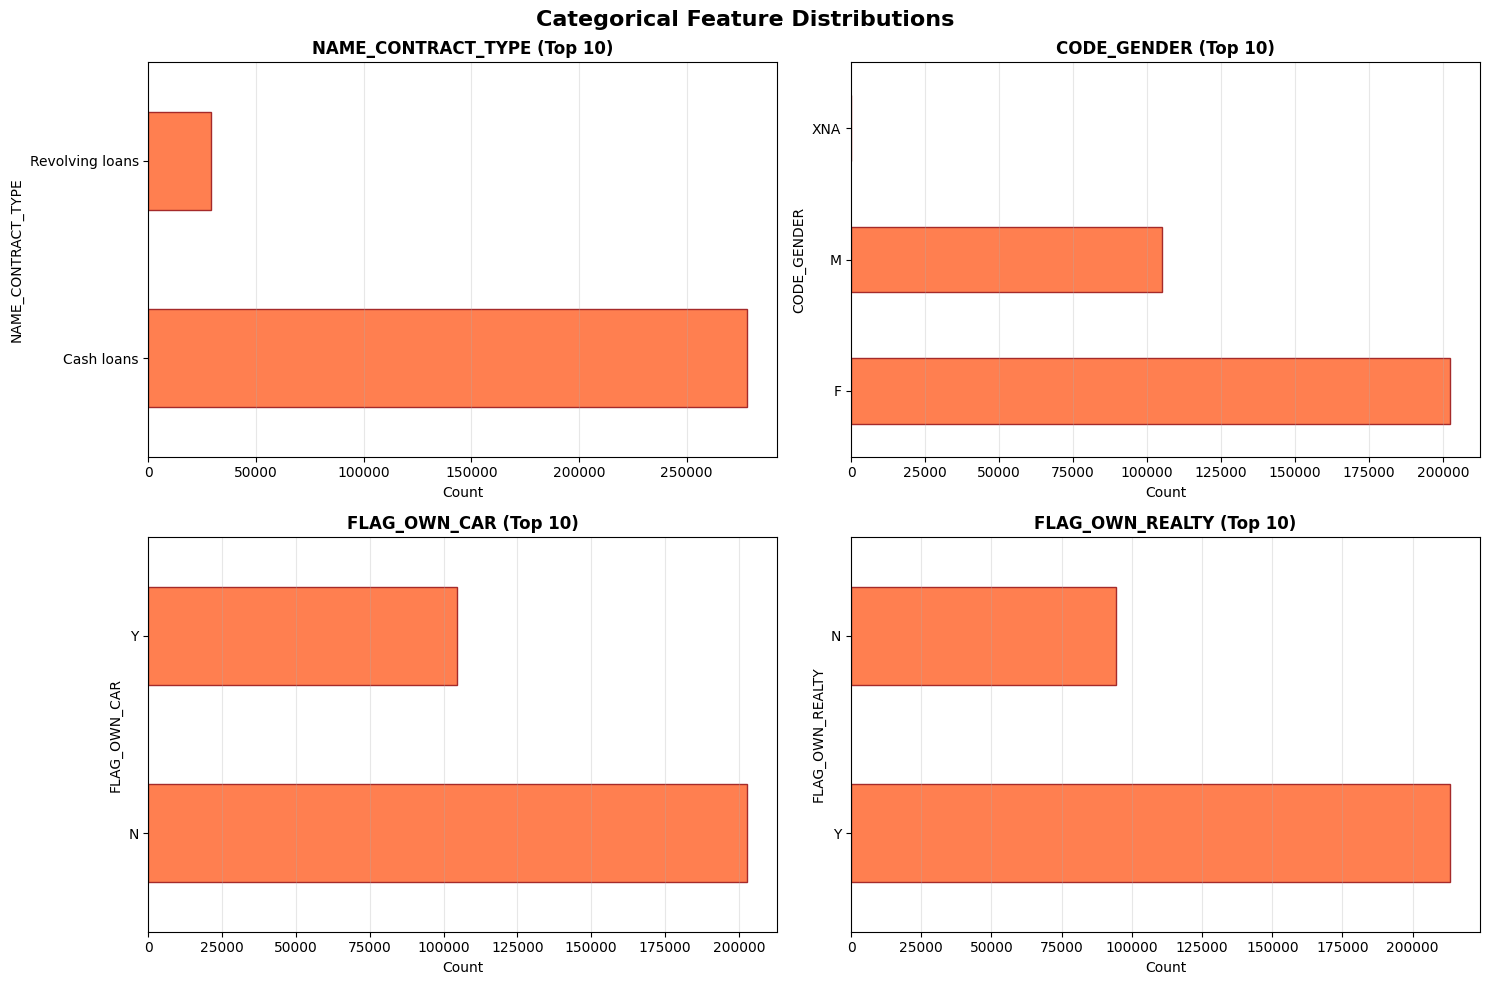

Generated categorical feature plots

UNIVARIATE ANALYSIS SUMMARY

 [Numeric Features Summary]
                    Feature          Mean       Median  Standard_Deviation      Minimum       Maximum    Skewness      Kurtosis  Missing%
                 SK_ID_CURR 278180.518577 278202.00000       102790.175348 100002.00000  4.562550e+05   -0.001200     -1.198988       0.0
               CNT_CHILDREN      0.407455      0.00000            0.683742      0.00000  2.500000e+00    1.478493      0.979218       0.0
           AMT_INCOME_TOTAL 162626.947877 147150.00000        73303.150927  25650.00000  3.375000e+05    0.783688     -0.037109       0.0
                 AMT_CREDIT 592313.037054 513531.00000       380316.240537  45000.00000  1.616625e+06    0.880716      0.068414       0.0
                AMT_ANNUITY  26797.657150  24903.00000        13281.285661   1615.50000  6.170400e+04    0.705296     -0.014835       0.0
            AMT_GOODS_PRICE 527855.325029 450000.00000       337010.362814  40

In [ ]:
# df_clean = application_train_cleaned
def univariate_analysis(df, target_col = 'TARGET'):
    """ 
    - Distribution characteristics
    - Central tendency and spread
    - Predictive power relative to target
    """
    
    numeric_features = df.select_dtypes(include = [np.number]).columns.tolist()
    numeric_features = [col for col in numeric_features if col != target_col]
    
    categorical_features = df.select_dtypes(include = ["object"]).columns.tolist()
    
    print(f"\n Numeric Features: {len(numeric_features)}")
    print(f"\n Categorical Features: {len(categorical_features)}\n")
    
    # Numerical Feature Analysis
    print("="*60)
    print("Numerical Feature Analysis")
    print("="*60)
    
    numeric_summary = []
    
    for col in numeric_features[:20]:
        
        print(f"\n[Feature: {col}]")
        
        # basic statistics
        mean_val = df[col].mean()
        median_val = df[col].median()
        std_val = df[col].std()
        min_val = df[col].min()
        max_val = df[col].max()
        
        
        # Distribution metrics
        skewness = df[col].skew()
        kurtosis = df[col].kurtosis()
        
        missing_pct = 100 * df[col].isnull().sum() / len(df)
        
        print(f"Mean: {mean_val:,.2f} | Median: {median_val:,.2f} | Std: {std_val:,.2f}")
        print(f"Range: [{min_val:.2f}, {max_val:,.2f}]")
        print(f"Skewness: {skewness:,.2f} | Kurtosis: {kurtosis:,.2f}")
        print(f"Missing Percentage: {missing_pct:.2f}%")
        
        
        # Interpretation
        if abs(skewness) > 1:
            print(f"Highly skewed distribution ({'right' if skewness > 0 else 'left'})")
            
        if abs(kurtosis) > 3:
            print(f"Heavy-tailed distribution (kurtosis = {kurtosis:.2f})")
            
        numeric_summary.append({
            "Feature": col,
            "Mean": mean_val,
            "Median": median_val,
            "Standard_Deviation": std_val,
            "Minimum": min_val,
            "Maximum": max_val,
            "Skewness": skewness,
            "Kurtosis": kurtosis,
            "Missing%": missing_pct
            
        })
        
    # creating a numeric df
    numeric_df = pd.DataFrame(numeric_summary)
    
    print("="*60)
    print("Distribution Visualizations")
    print("="*60)
    
    # plot distributions for key numeric features
    fig, axes = plt.subplots(3, 2, figsize = (15, 12))
    fig.suptitle("Univariate Distributions - Key Credit Features", fontsize = 16, fontweight = "bold")
    axes = axes.flatten()
    
    for idx, col in enumerate(numeric_features[:6]):
        ax = axes[idx]
        
        # histogram
        df[col].hist(bins = 50, alpha = 0.60, color = "steelblue", edgecolor = "brown", ax = ax)
        ax.set_title(f'{col}\n (Skew = {df[col].skew():.2f})', fontweight = "bold")
        ax.set_xlabel(col)
        ax.set_ylabel(("Frequency"))
        ax.grid(axis='y', alpha=0.3)
        
        # adding mean and median lines
        ax.axvline(df[col].mean(), color = "red", linestyle = "--", linewidth = 2, label = f"Mean={df[col].mean():.0f}")
        ax.axvline(df[col].median(), color = "green", linestyle = "--", linewidth = 2, label = f"Median={df[col].median():.0f}")
        ax.legend()
    
    plt.tight_layout()
    print("Generated Distribution plots")
    
    print("="*60)
    print("Box Plots for Outliers Detection")
    print("="*60)
    
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    fig.suptitle("Box Plots - Outlier Analysis", fontsize=16, fontweight = "bold")
    axes = axes.flatten()
    
    for ax, col in zip(axes, numeric_features[:6]):
        data = df[col].dropna()
        
        ax.boxplot(data)
        ax.set_title(col)
        
    print("Generated box plots")
    
    print("="*60)
    print("Categorical Feature Analysis")
    print("="*60)
    
    categorical_summary = []
    
    # taking 4 categorical variables for exploration
    
    for col in categorical_features[:4]:
        print(f"Feature: {col}")
        value_counts = df[col].value_counts()
        unique_count = df[col].nunique()
        mode_val = df[col].mode()[0] if not df[col].mode().empty else None
        
        print(f" Unique Values: {unique_count}")
        print(f" Mode: {mode_val}")
        print(f"Top 5 Categories:")
        print(value_counts.head().to_string())
        
        categorical_summary.append({
            "Feature": col,
            "Unique_Values": unique_count,
            "Mode": mode_val
        })
    
    # Bar plots for categorical features
    if categorical_features:
        print("\n" + "="*60)
        print("Categorical Feature Distributions")
        print("="*60)

        # plotting up to 4 categorical features
        num_cat = min(4, len(categorical_features))
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle("Categorical Feature Distributions", fontsize=16, fontweight="bold")

        for ax, col in zip(axes.flatten(), categorical_features[:num_cat]):
            value_counts = df[col].value_counts().head(10)
            value_counts.plot.barh(ax=ax, color="coral", edgecolor="brown")
            ax.set_title(f"{col} (Top 10)", fontweight="bold")
            ax.set_xlabel("Count")
            ax.grid(axis="x", alpha=0.3)

        # removing unused subplots if less than 4 features
        for ax in axes.flatten()[num_cat:]:
            ax.remove()

        plt.tight_layout()
        plt.show()
        print("Generated categorical feature plots")
    else:
        print("\n No categorical features to plot")
        
    
    print("\n" + "=" * 60)
    print("Univariate Analysis Summary")
    print("=" * 60)
    
    print("\n [Numeric Features Summary]")
    print(numeric_df.to_string(index=False))
    
    if categorical_summary:
        print("\n[Categorical Features Summary]")
        categorical_df = pd.DataFrame(categorical_summary)
        print(categorical_df.to_string(index=False))
    
    return {
        "numeric_summary": numeric_df,
        "categorical_summary": pd.DataFrame(categorical_summary) if categorical_summary else None
    }




results = univariate_analysis(df_clean)